<a href="https://colab.research.google.com/github/ramigalv60/Inteligencias-Artificiales-TIC/blob/main/Clase-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#2. Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

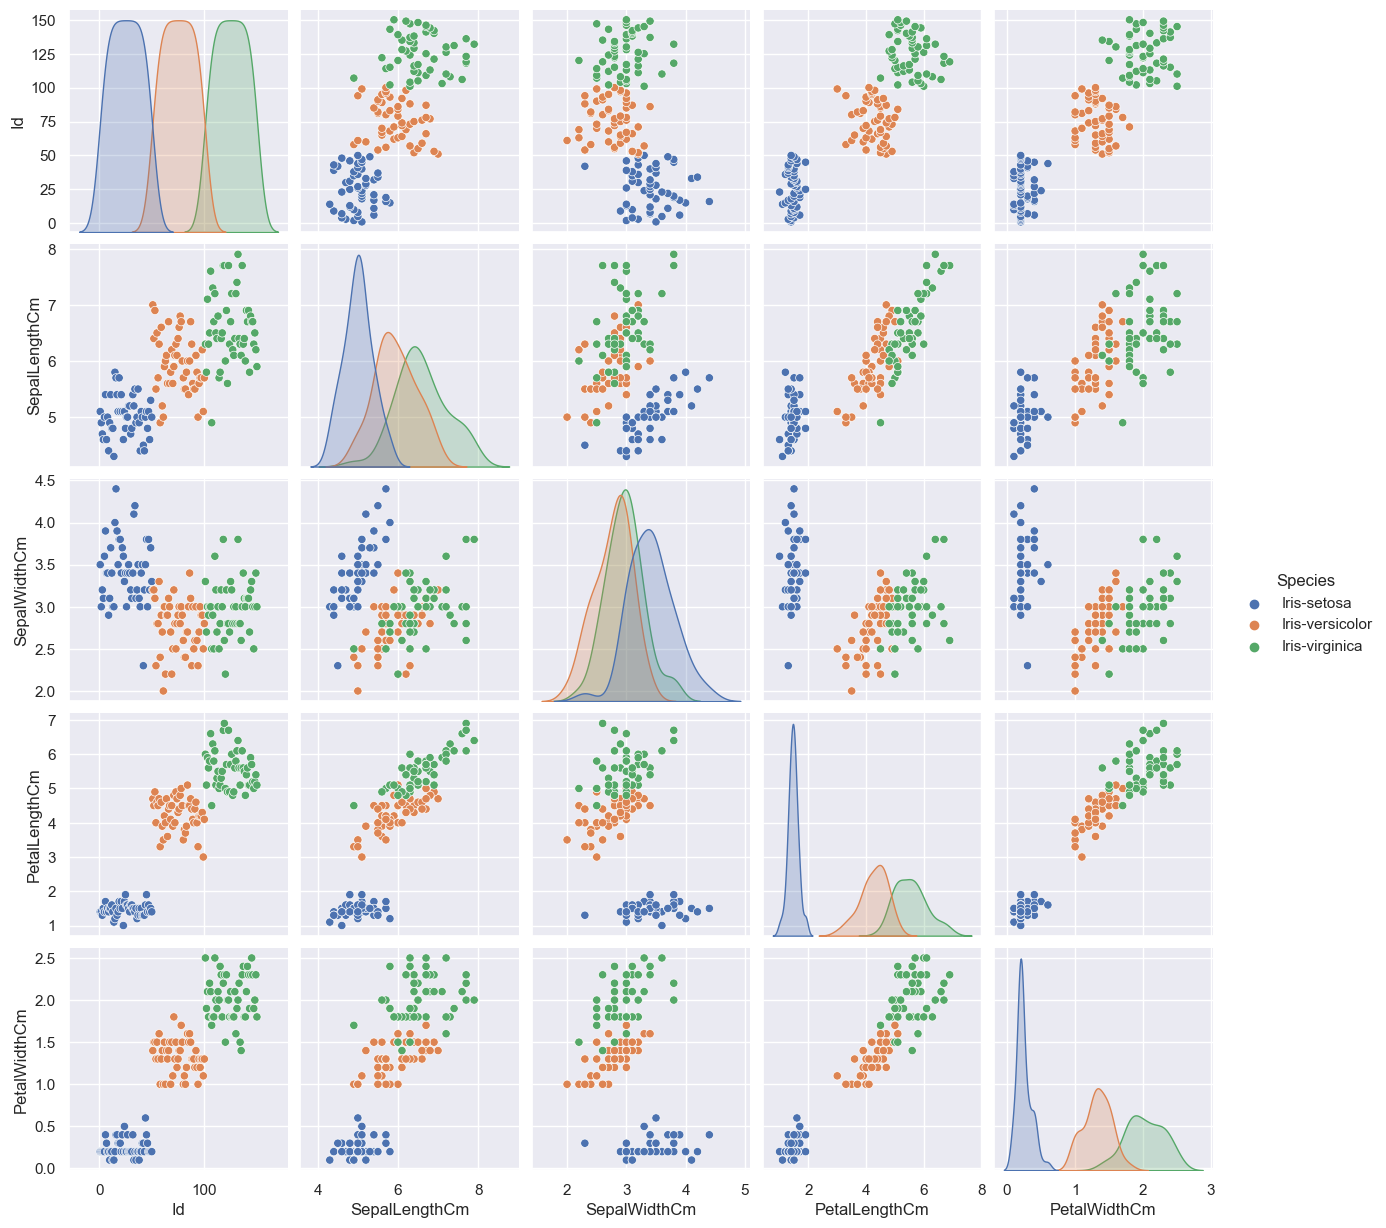

In [48]:
sns.set_theme(style="darkgrid")
sns.pairplot(df, hue="Species")
plt.show()

#3. Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.

In [47]:
# Encode categorical attribute
le = LabelEncoder()
X = df['Species']
X_encoded = le.fit_transform(X)
y = df['PetalWidthCm']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y)

#4. Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

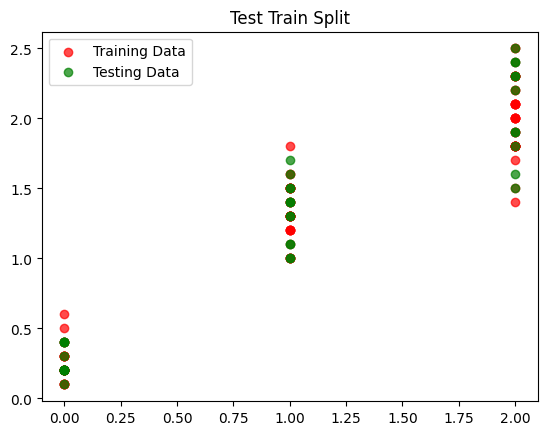

In [48]:
plt.scatter(X_train, y_train, label='Training Data', color='r', alpha=.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

#5. Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [49]:
LR = LinearRegression().fit(X_train.reshape(-1, 1), y_train.values)


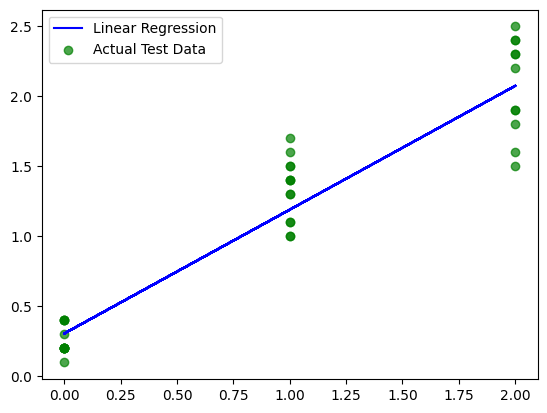

In [50]:
predicted = LR.predict(X_test.reshape(-1, 1))
plt.plot(X_test, predicted, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [51]:
LR.score(X_test.reshape(-1, 1), y_test.values)

0.9025510868141586

In [59]:
print('Mean Squared Error:', mean_squared_error(y_test, predicted))

Mean Squared Error: 0.05871297019446942


In [60]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))

Root Mean Squared Error: 0.24230759417416


In [61]:
print(cross_val_score(LR, X_encoded.reshape(-1, 1), y, cv=3))

[-12.95490057  -0.95191003  -1.97397327]


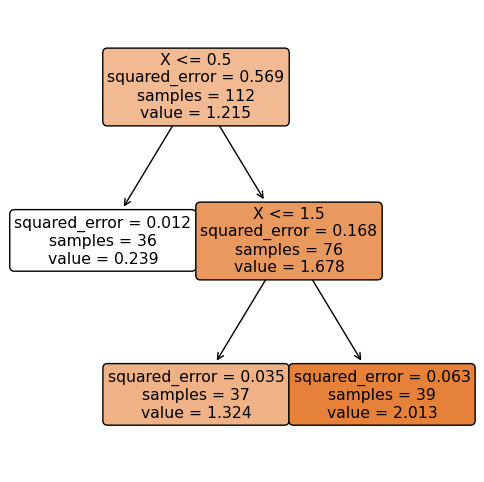

In [52]:
tree_regressor = DecisionTreeRegressor(max_depth=2, random_state=42).fit(X_train.reshape(-1, 1), y_train.values)
y_pred_tree = tree_regressor.predict(X_test.reshape(-1, 1), )

plt.figure(figsize=(6, 6))
plot_tree(tree_regressor, filled=True, rounded=True, feature_names=['X'])
plt.show()

Los resultados del arbol se evaluan en funcion del MSE, el MAE y la cross-validation, entre otras, dependiendo mucho ademas del tipo de problema y la forma de validacion. Por ejemplo el MSE mide la diferencia cuadrada promedio entre las predicciones del modelo y los valores reales. Es una métrica común para problemas de regresión, donde se busca minimizar el MSE. Cuanto menor sea el valor del MSE, mejor será el rendimiento del modelo, el MAE es similar al MSE, pero en lugar de elevar al cuadrado las diferencias, toma el valor absoluto. Y por ultimo la validación cruzada es una técnica para evaluar el rendimiento del modelo en múltiples subconjuntos de datos la cual ayuda a estimar la capacidad de generalización del modelo y a detectar posibles problemas de sobreajuste o subajuste.

Los arboles por otra parte pueden ser elegidos algunos mejores que otros al cambiar la profundidad al mismo al no dejar que el model haga overfitting y obtenga un puntaje perfecto encontrando patrones que solo existen en las muestras proporcionadas por decirlo de alguna manera

#6. Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.

Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

In [53]:
# set a threshold value
threshold = 1.0

# convert continuous target variable to binary variable
y_train_binary = np.where(y_train > threshold, 1, 0)

# fit the logistic regression model with binary target variable
logreg = LogisticRegression().fit(X_train.reshape(-1, 1), y_train_binary)


In [54]:
# set a threshold value
threshold = 1.0

# convert continuous target variable to binary variable
y_test_binary = np.where(y_test > threshold, 1, 0)

# calculate accuracy score with binary target variable
print("Accuracy:", accuracy_score(y_test_binary, logreg.predict(X_test.reshape(-1, 1))))


Accuracy: 0.9473684210526315


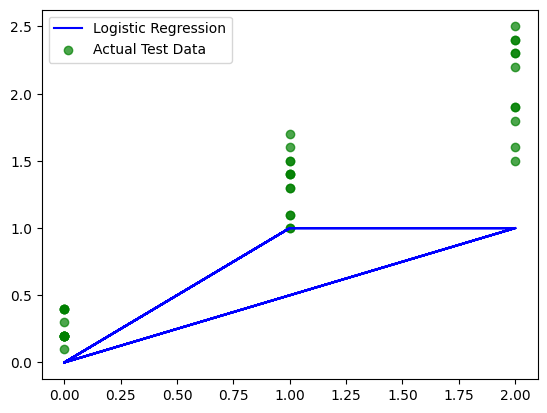

In [56]:
predicted2 = logreg.predict(X_test.reshape(-1, 1))
plt.plot(X_test, predicted2, label='Logistic Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()

In [69]:
# Crear un modelo de árbol de decisión
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Convert the continuous target variable to a categorical variable
y_train_categorical = pd.cut(y_train, bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])
y_test_categorical = pd.cut(y_test, bins=[0, 1, 2, 3], labels=['low', 'medium', 'high'])

clf = DecisionTreeClassifier()
clf.fit(X_train.reshape(-1, 1), y_train_categorical)
y_pred = clf.predict(X_test.reshape(-1, 1))
accuracy = accuracy_score(y_test_categorical, y_pred)
print("Precisión:", accuracy)

Precisión: 0.7894736842105263


#7. Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?

##Validación Cruzada de K-Folds (K-Fold Cross-Validation):

#Ventajas:
Ampliamente utilizado y bien entendido.
Proporciona una estimación más robusta del rendimiento del modelo al promediar sobre múltiples divisiones de datos.
#Desventajas:
Requiere más tiempo de cálculo ya que entrena y evalúa el modelo K veces (donde K es el número de pliegues).
No siempre es adecuado para conjuntos de datos grandes o desequilibrados.

##Validación Cruzada de Leave-One-Out (LOOCV):

#Ventajas:
Proporciona una estimación de sesgo baja, ya que se utiliza un solo ejemplo como conjunto de prueba en cada iteración.
#Desventajas:
Puede ser computacionalmente costoso, especialmente en conjuntos de datos grandes, ya que se realiza una división por cada punto de datos.

##Validación Cruzada Estratificada (Stratified Cross-Validation):

#Ventajas:
Mantiene la proporción de clases en cada pliegue, lo que es útil en problemas de clasificación con clases desequilibradas.
#Desventajas:
Puede ser menos apropiada en problemas de regresión o cuando las clases no están claramente definidas.

##Validación Cruzada Aleatoria (Randomized Cross-Validation):

#Ventajas:
Proporciona una estimación del rendimiento del modelo con un tiempo de cálculo menor que K-Fold, ya que se selecciona un subconjunto aleatorio de datos para cada pliegue.
#Desventajas:
La aleatoriedad puede llevar a una variación considerable en las estimaciones del rendimiento.

##Validación Cruzada por Bloques (Block Cross-Validation):

#Ventajas:
Adecuada para conjuntos de datos que pueden dividirse en bloques lógicos, como series temporales.
#Desventajas:
Requiere una comprensión detallada de la estructura de los datos y no es aplicable a todos los conjuntos de datos.

##Validación Cruzada por Grupos (Group Cross-Validation):

#Ventajas:
Útil cuando se tienen grupos de datos relacionados que no deben dividirse, como datos de pacientes en un estudio clínico.
#Desventajas:
Requiere información adicional para definir los grupos y puede ser complicado de implementar.

#8. Escribir una conclusión sobre el trabajo realizado.

En resumen, los modelos de regresión lineal y regresión logística son herramientas esenciales en el aprendizaje automático y la estadística para resolver problemas de regresión y clasificación, respectivamente. Los modelos de regresión lineal buscan encontrar relaciones lineales entre las variables de entrada y de salida, mientras que los modelos de regresión logística se utilizan para clasificar observaciones en categorías discretas. Ambos modelos son interpretables y ampliamente utilizados en una variedad de campos.

Por otro lado, los árboles de decisión son modelos versátiles que pueden utilizarse tanto para regresión como para clasificación. Estos modelos dividen el conjunto de datos en subconjuntos basados en características y reglas simples, lo que los hace fácilmente interpretables. Sin embargo, pueden ser propensos al sobreajuste si no se controlan adecuadamente.

Los diferentes métodos de validación cruzada, como K-Fold Cross-Validation, LOOCV, Stratified Cross-Validation, entre otros, son herramientas esenciales para evaluar y comparar modelos de manera objetiva. Ayudan a estimar el rendimiento del modelo en datos no vistos y a detectar problemas de sesgo o varianza. La elección del método de validación cruzada depende del problema específico y de las características de los datos.

Aprender cómo funcionan estos modelos y métodos de validación es crucial para desarrollar modelos de aprendizaje automático efectivos y tomar decisiones informadas sobre la selección de modelos y la interpretación de resultados. La librería scikit-learn, con su amplia gama de herramientas y algoritmos, facilita enormemente el proceso de desarrollo de modelos y la experimentación con diferentes técnicas de validación, lo que la convierte en una herramienta invaluable para los científicos de datos y desarrolladores de aprendizaje automático.